# Ex 9-2: Stock Prediction

- 주가 예측 모델을 만드는 것이 목표 
- 5일 간의 open, high, low, close, volume, change 값을 사용하여 그 다음날 close 값을 예측


In [1]:
!pip install finance-datareader

    100% |████████████████████████████████| 61kB 1.6MB/s ta 0:00:011
    100% |████████████████████████████████| 5.6MB 7.3MB/s  eta 0:00:01
    100% |████████████████████████████████| 143kB 28.8MB/s ta 0:00:01
    100% |████████████████████████████████| 163kB 28.9MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 21.0MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 28.7MB/s ta 0:00:01   25% |████████▎                       | 30kB 31.9MB/s eta 0:00:01
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from keras.models import Sequential, load_model
from keras import layers
from keras import backend as K
from keras import optimizers
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import FinanceDataReader as fdr


Using TensorFlow backend.


## Data 준비

### Data 불러오기

- 원하는 주식 종목을 선택하여 데이터를 불러옴 

In [2]:
df_krx = fdr.StockListing('KRX')
df_krx

,Symbol,Name,Sector,Industry
0,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
1,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
2,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
3,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"
5,001740,SK네트웍스,기타 전문 도매업,"종합무역업(전자전기제품,섬유,에너지화학제품,철강금속제품),의류,수입산합판,MDF판매..."
6,096770,SK이노베이션,석유 정제품 제조업,"석유정제,석유화학제품,윤활유제품,아스팔트제품,의약중간체 제조,판매,유전개발,대체에너지사업"
7,011810,STX,상품 종합 도매업,"에너지 원료(석탄,석유),산업기자재(기계부품) 도매"
8,024070,WISCOM,플라스틱제품 제조업,"플라스틱제품(PVC컴파운드,ABS,PS가공) 제조,도매,임가공"
9,011420,갤럭시아에스엠,스포츠 서비스업,"스포츠중계권,스포츠마케팅,광고"


In [3]:
df_krx[df_krx['Name'].str.contains("현대자동차")]

,Symbol,Name,Sector,Industry
2098,005380,현대자동차,자동차용 엔진 및 자동차 제조업,"자동차(승용차,버스,트럭,특장차),자동차부품,자동차전착도료 제조,차량정비사업"


In [4]:
df = fdr.DataReader('005380', '2000')
print(df.shape)
df = df.dropna()
print(df.shape)

(4777, 6)
(4777, 6)


In [5]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-01-04,19000,20700,18600,20700,2028370,0.150000
2000-01-05,21000,22500,19500,20800,4091650,0.004831
2000-01-06,21300,21700,19100,19700,1899330,-0.052885
2000-01-07,20900,21100,20000,20300,2206950,0.030457
2000-01-10,21500,21600,19750,20000,1931830,-0.014778


### Scaling data

<font color=blue>

TO DO: MinMaxScaler를 사용해 x와 y의 scaling 진행 http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html <br>
    x와 y의 scaler를 따로 생성하여 예측된 y를 inverse scaling 하는데 사용 <br>

- x: 'Close'를 포함한 모든 column <br>
- y: 'Close'

In [9]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x = scaler_x.fit_transform(df)
y = scaler_y.fit_transform(df.iloc[:,[3]]) 

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Text(0, 0.5, 'Close')

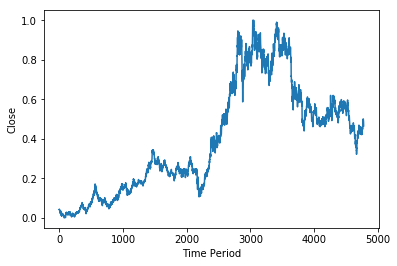

In [10]:
plt.plot(y)
plt.xlabel("Time Period")
plt.ylabel("Close")

### Construct input and output sequences

<font color=blue>
    
 TO DO: Input과 output sequence 만들기 

- `# Example 9-1:  RNN - Toy Example`의 "Construct training instances" 참고
- dataX: 5일 간 6개 변수 값. 
- dataY: 다음 날 close 값.

In [11]:
SEQ_LEN = 5

In [12]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - SEQ_LEN):
    _x = x[i:i + SEQ_LEN ]
    _y = y[i + SEQ_LEN]  
    dataX.append(_x)
    dataY.append(_y)

In [13]:
np.shape(dataX), np.shape(dataY)

((4772, 5, 6), (4772, 1))

#### Train/test split

In [14]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
Xtrain, Xtest = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
ytrain, ytest = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

- 가장 최근 30%  자료를 test set으로 분리 

In [15]:
np.shape(Xtrain), np.shape(Xtest)

((3340, 5, 6), (1432, 5, 6))

## Model building

<font color=blue> 

TO DO: LSTM, Dense, Dropout 등을 사용하여 model 만들고 compile하여 확인.


In [72]:
model = Sequential()

model.add(layers.LSTM(32, input_shape = (SEQ_LEN, 6), return_sequences = True, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32, return_sequences = False, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1))

model.compile(loss='mse',optimizer='adam')


In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 32)                4992      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


## Model fitting and checking with Tensorboard

<font color=blue>

TO DO: 위에서 생성한 model을 training. 

- Tensorboard를 통해 training과 validation loss 확인
- Validation loss 기준 best model을 저장

In [74]:
now = time.strftime("%c")
callbacks_list = [
    TensorBoard(log_dir = 'logs/stock_prediction/node32'+now, histogram_freq = 0, write_graph = True),
    ModelCheckpoint(filepath="models/stock_prediction_node32.h5", monitor='val_loss', verbose=0, save_best_only=True)
]

model.fit(Xtrain, ytrain, 
          batch_size = 128, 
          epochs = 100, 
          validation_split = 0.3, 
          callbacks = callbacks_list)

Train on 2338 samples, validate on 1002 samples
Epoch 1/100
2338/2338 [==============================] - 2s 949us/step - loss: 0.0158 - val_loss: 0.2160
Epoch 2/100
2338/2338 [==============================] - 0s 104us/step - loss: 0.0055 - val_loss: 0.1003
Epoch 3/100
2338/2338 [==============================] - 0s 103us/step - loss: 0.0020 - val_loss: 0.0120
Epoch 4/100
2338/2338 [==============================] - 0s 97us/step - loss: 1.4765e-04 - val_loss: 0.0052
Epoch 5/100
2338/2338 [==============================] - 0s 97us/step - loss: 6.9364e-05 - val_loss: 0.0019
Epoch 6/100
2338/2338 [==============================] - 0s 101us/step - loss: 5.0373e-05 - val_loss: 0.0023
Epoch 7/100
2338/2338 [==============================] - 0s 90us/step - loss: 4.3629e-05 - val_loss: 0.0023
Epoch 8/100
2338/2338 [==============================] - 0s 90us/step - loss: 4.1192e-05 - val_loss: 0.0022
Epoch 9/100
2338/2338 [==============================] - 0s 91us/step - loss: 3.8243e-05 - val_l

2338/2338 [==============================] - 0s 92us/step - loss: 2.6148e-05 - val_loss: 9.7221e-04
Epoch 76/100
2338/2338 [==============================] - 0s 96us/step - loss: 2.6268e-05 - val_loss: 9.6835e-04
Epoch 77/100
2338/2338 [==============================] - 0s 87us/step - loss: 2.6261e-05 - val_loss: 0.0014
Epoch 78/100
2338/2338 [==============================] - 0s 89us/step - loss: 2.6979e-05 - val_loss: 0.0013
Epoch 79/100
2338/2338 [==============================] - 0s 89us/step - loss: 2.8008e-05 - val_loss: 0.0018
Epoch 80/100
2338/2338 [==============================] - 0s 92us/step - loss: 2.7123e-05 - val_loss: 0.0014
Epoch 81/100
2338/2338 [==============================] - 0s 92us/step - loss: 2.6354e-05 - val_loss: 8.2335e-04
Epoch 82/100
2338/2338 [==============================] - 0s 99us/step - loss: 2.6186e-05 - val_loss: 0.0014
Epoch 83/100
2338/2338 [==============================] - 0s 92us/step - loss: 2.6673e-05 - val_loss: 0.0011
Epoch 84/100
2338/23

## Prediction

In [75]:
model = load_model('models/stock_prediction_node32.h5')
test_predict = model.predict(Xtest)
test_predict_back = scaler_y.inverse_transform(test_predict)
ytest_back = scaler_y.inverse_transform(ytest)

- output 값을 original scale로 재변환

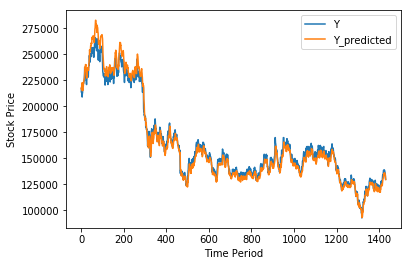

In [76]:
# Plot predictions
plt.plot(ytest_back, label = 'Y')
plt.plot(test_predict_back, label = 'Y_predicted')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [77]:
mean_absolute_error(test_predict_back, ytest_back), np.mean(test_predict_back / ytest_back) - 1

(4256.958968008031, -0.008530467820767051)